### Hints for Homework Problems - Chapter 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import time
from scipy.stats import norm, logistic

### Chapter 1- Part 1- Problem 1

We want to test **Algorithm 1** and **Algorithm 2** on the Slide 5 example,  
where the distribution is given by:

$P(X=1) = \tfrac{1}{6}, \quad 
P(X=2) = \tfrac{1}{3}, \quad 
P(X=3) = \tfrac{1}{2}.$

---

1. **Algorithm 1 (Inverse CDF method)**  
   - Generate $U \sim U(0,1)$.  
   - Traverse probabilities in order $(1,2,3)$.  
   - Accumulate probabilities until the sum exceeds $U$.  
   - Output the corresponding value of $X$.

2. **Algorithm 2 (Sorted CDF method)**  
   - Reorder probabilities in descending order:  
     $ \tfrac{1}{2}, \tfrac{1}{3}, \tfrac{1}{6} $  
     corresponding to outcomes $(3,2,1)$.  
   - Compute cumulative sums in that order.  
   - Generate $U \sim U(0,1)$ and find the first cumulative sum greater than $U$.  
   - Return the corresponding outcome.

3. **Testing**  
   - Run both algorithms many times (e.g. $N = 1000$).  
   - Compute empirical frequencies of $\{1,2,3\}$.  
   - Compare with theoretical distribution $[1/6,\, 1/3,\, 1/2]$.  
   - Optionally, compare **average number of comparisons**:  
     - Algorithm 1: expected $\approx 2.33$ steps.  
     - Algorithm 2: expected $\approx 1.67$ steps.  
   - Thus, both algorithms are correct, but Algorithm 2 is more efficient.

Algorithm 1 empirical: [0.176, 0.319, 0.505]
Algorithm 2 empirical: [0.173, 0.358, 0.469]
Theoretical probs:     [0.16666666666666666, 0.3333333333333333, 0.5]


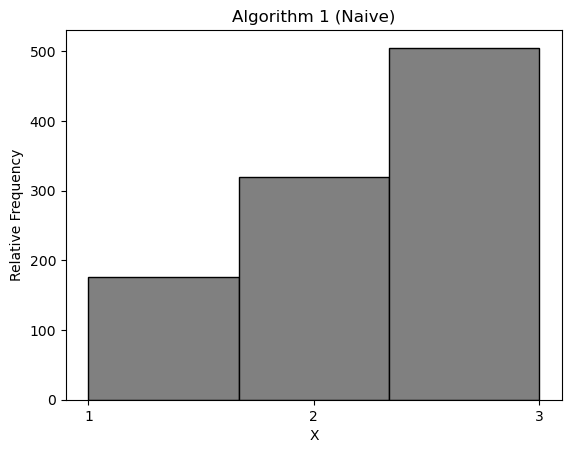

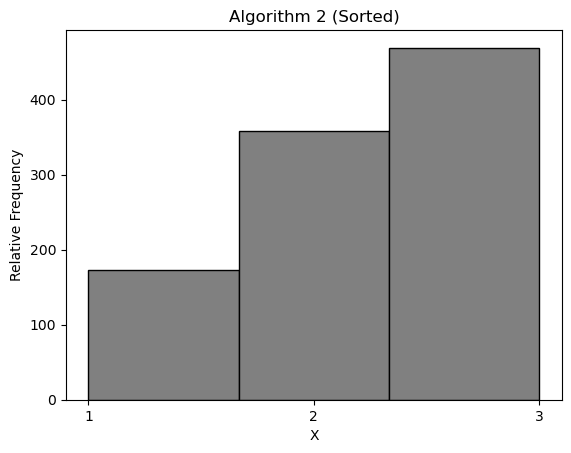

In [2]:
# ---------------------------------------------------------
# Algorithm 1 (Naive Cumulative Order Sampling)
# ---------------------------------------------------------
def alg1_sample(p, X):
    """
    Sample from a discrete random variable using the naive cumulative method.

    Parameters
    ----------
    p : array-like
        Probabilities associated with each outcome. Must sum to 1.
    X : array-like
        Outcomes corresponding to probabilities in `p`.

    Returns
    -------
    int or float
        A sampled outcome from X, according to probabilities p.

    Notes
    -----
    This algorithm works by:
    1. Generating U ~ Uniform(0,1).
    2. Iteratively summing probabilities until the cumulative sum exceeds U.
    3. Returning the corresponding outcome.
    """
    U = np.random.rand()         #step 1: draw uniform random number
    cum = 0
    for i, pi in enumerate(p):   #step 2: cumulative sum loop
        cum += pi
        if U < cum:              #step 3: compare with U
            return X[i]

# ---------------------------------------------------------
# Algorithm 2 (Sorted Cumulative Order Sampling)
# ---------------------------------------------------------
def alg2_sample(p, X):
    """
    Sample from a discrete random variable using the cumulative method 
    with probabilities sorted in descending order (more efficient when 
    some probabilities are large).

    Parameters
    ----------
    p : array-like
        Probabilities associated with each outcome. Must sum to 1.
    X : array-like
        Outcomes corresponding to probabilities in p.

    Returns
    -------
    int or float
        A sampled outcome from X, according to probabilities p.

    Notes
    -----
    This algorithm improves efficiency in practice by sorting probabilities 
    in descending order. The outcomes are reordered accordingly:
        1. sort (p, X) pairs in descending probability order.
        2. generate U ~ Uniform(0,1).
        3. iterate through cumulative sums until U is exceeded.
        4. return the corresponding outcome.
    """
    #step 1: sort probabilities and outcomes together
    paired = sorted(zip(p, X), key=lambda x: x[0], reverse=True)
    p_sorted, dist = zip(*paired)

    U = np.random.rand()                #step 2: draw uniform random number
    cum = 0
    for i, pi in enumerate(p_sorted):   #step 3: cumulative sum loop
        cum += pi
        if U < cum:                     #step 4: compare with U
            return dist[i]
        
def plot_discrete_hist(samples, outcomes, p, title):
    """
    Plot histogram of sampled values compared to theoretical probabilities.
    
    Parameters
    ----------
    samples : list or array
        Simulated sample outcomes.
    outcomes : array-like
        Possible values of the discrete random variable.
    p : array-like
        Theoretical probabilities for each outcome.
    title : str
        Title of the plot.
    """
    # plot histogram of empirical samples
    plt.hist(samples,bins = 3, color="grey", edgecolor="black")
    plt.xticks(outcomes)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Relative Frequency")
    plt.show()

# slide 5 example pmf
p = np.array([1/6, 1/3, 1/2])   # probabilities
X = np.array([1, 2, 3])  # labels
N = 1000  # number of samples to generate

# generate samples using Algorithm 1 (naive cumulative)
samples1 = [alg1_sample(p, X) for _ in range(N)]

# generate samples using Algorithm 2 (sorted cumulative)
samples2 = [alg2_sample(p, X) for _ in range(N)]

# compute empirical frequencies for each possible outcome
freq1 = [samples1.count(x)/N for x in X]
freq2 = [samples2.count(x)/N for x in X]

# print results
print("Algorithm 1 empirical:", freq1)
print("Algorithm 2 empirical:", freq2)
print("Theoretical probs:    ", p.tolist())

# plot results
plot_discrete_hist(samples1, X, p, "Algorithm 1 (Naive)")
plot_discrete_hist(samples2, X, p, "Algorithm 2 (Sorted)")

### Chapter 1 - Part 1 - Problem 2
To generate samples from the discrete random variable taking values 
$X = \{1,3,5\}$ with probabilities $p = \{1/9, 3/9, 5/9\}$, you can use 
the **sampling functions** from Algorithm 1 (naive cumulative method) 
and Algorithm 2 (sorted cumulative method).  

Steps:
1. Define the outcomes `X` and probabilities `p`.
2. Use either `alg1_sample(p, X)` or `alg2_sample(p, X)` in a loop to 
   generate a sample of size $n$.
3. Compute empirical frequencies to compare against theoretical probabilities.
4. Plot a histogram of the generated samples and overlay the theoretical distribution.



Algorithm 1 empirical: [0.117, 0.36, 0.523]
Algorithm 2 empirical: [0.111, 0.323, 0.566]
Theoretical probs:     [0.1111111111111111, 0.3333333333333333, 0.5555555555555556]


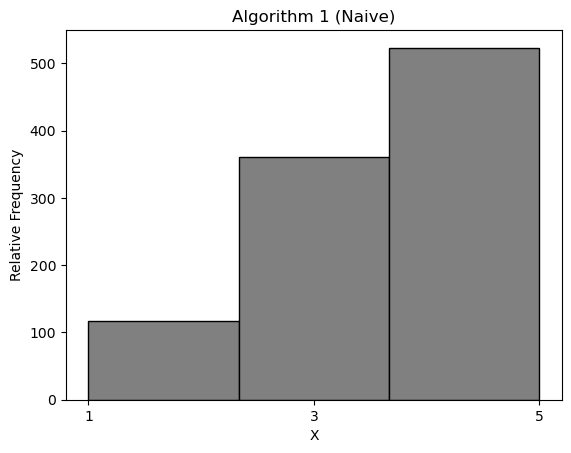

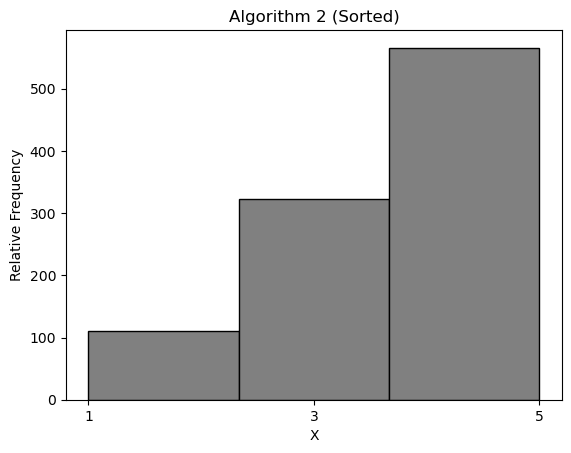

In [3]:
# problem 2 pmf
X = np.array([1, 3, 5])
p = np.array([1/9, 3/9, 5/9])   # must sum to 1
N = 1000                        # sample size

# generate samples using Algorithm 1 (naive cumulative)
samples1 = [alg1_sample(p, X) for _ in range(N)]

# generate samples using Algorithm 2 (sorted cumulative)
samples2 = [alg2_sample(p, X) for _ in range(N)]

# compute empirical frequencies for each possible outcome
freq1 = [samples1.count(x)/N for x in X]
freq2 = [samples2.count(x)/N for x in X]

# print results
print("Algorithm 1 empirical:", freq1)
print("Algorithm 2 empirical:", freq2)
print("Theoretical probs:    ", p.tolist())

# plot results
plot_discrete_hist(samples1, X, p, "Algorithm 1 (Naive)")
plot_discrete_hist(samples2, X, p, "Algorithm 2 (Sorted)")

### Chapter 1 - Part 1 - Problem 3

We are asked to generate samples from a discrete random variable taking values 
$1, 3, 5, \dots, 99$ with probabilities proportional to the outcomes.  

Steps:
1. Define the outcome space $X = \{1, 3, 5, \dots, 99\}$.  
2. Define the probability mass function:
   $$
   p(i) = \frac{i}{50^2}, \quad i \in X
   $$
   so that probabilities sum to 1.  
3. Use **Algorithm 1** or **Algorithm 2** (from earlier) to sample values.  
4. Generate a large sample (e.g. $n=1000$).  
5. Plot a histogram of the sampled values to visualize the distribution.


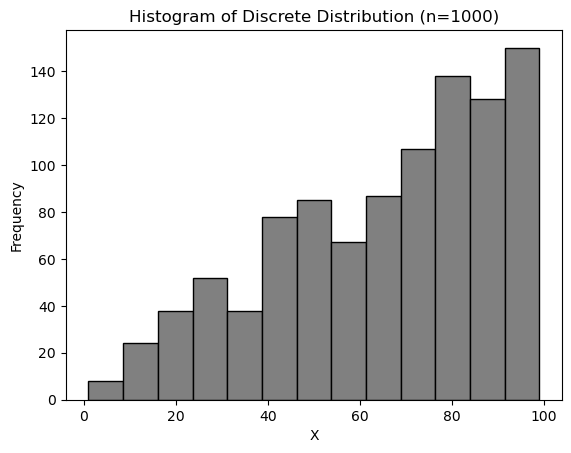

In [4]:
# X: odd numbers from 1 to 99
X = np.arange(1, 100, 2)   # [1, 3, 5, ..., 99]

# p: proportional to X
p = X / (50**2)  # ensures sum(p) = 1

# generate N samples
N = 1000

# use efficient algorithm 2
samples = [alg2_sample(p, X) for _ in range(N)]

# Freedman–Diaconis rule for bin width
q75, q25 = np.percentile(samples, [75 ,25])
iqr = q75 - q25
bin_width = 2 * iqr / (N ** (1/3))
bins = int(np.ceil((np.max(samples) - np.min(samples)) / bin_width))

# plot histogram
plt.hist(samples, bins=bins, color="grey", edgecolor="black")
plt.title("Histogram of Discrete Distribution (n=1000)")
plt.xlabel("X")
plt.ylabel("Frequency")
plt.show()

### Chapter 1 - Part 1 - Problem 4

For the Slide 5 example the probabilities are  
$$p_1=\tfrac{1}{6},\; p_2=\tfrac{1}{3},\; p_3=\tfrac{1}{2}.$$

---

- **Algorithm 1 (given order \(1,2,3\))**

  The stopping index \(I\) has $\mathbb{P}(I=i)=p_i$.  
  Thus the expected number of comparisons (iterations) is

  $$
  \mathbb{E}[I]
  =\sum_{i=1}^3 i\,p_i
  =1\cdot\frac{1}{6}+2\cdot\frac{1}{3}+3\cdot\frac{1}{2}.
  $$

  $$
  \mathbb{E}[I] = \frac{1}{6}+\frac{2}{3}+\frac{3}{2}
  =\frac{14}{6}=\frac{7}{3}\approx 2.3333.
  $$

---

- **Algorithm 2 (probabilities sorted descending: $p_{(1)}=\tfrac{1}{2},p_{(2)}=\tfrac{1}{3},p_{(3)}=\tfrac{1}{6}$, order $3,2,1$)**

  With the sorted order the expected number of comparisons is

  $$
  \mathbb{E}[I_{\text{sorted}}]
  =1\cdot\frac{1}{2}+2\cdot\frac{1}{3}+3\cdot\frac{1}{6}.
  $$

  $$
  \mathbb{E}[I_{\text{sorted}}] = \frac{1}{2}+\frac{2}{3}+\frac{1}{2}
  =\frac{5}{3}\approx 1.6667.
  $$

---

**Final Results:**  
- Algorithm 1: $\mathbb{E}[I]=\tfrac{7}{3}\approx 2.3333$  
- Algorithm 2: $\mathbb{E}[I]=\tfrac{5}{3}\approx 1.6667$


# Chapter 1 - Part 1 - Problem 5

Write an algorithm to generate samples from a Poisson distribution:
$$
	p_i = P\{X = i\} = \frac{e^{-\lambda}\lambda^i}{i!}, \quad i = 0,1,2,\dots
$$
using the recursive identity:  
$$
	p_{i+1} = \frac{\lambda}{i+1} p_i, \quad i \ge 0
$$

### Naive Approach
Algorithm steps:  
1. Generate a random number $U \sim \text{Uniform}(0,1)$.  
2. Initialize $i = 0 $, $p = e^{-\lambda}$, $F = p$.  
3. If $U < F$, set $X = i$ and stop.  
4. Update:  
   $$
   p \gets \frac{\lambda p}{i+1}, \quad F \gets F + p, \quad i \gets i+1
   $$
5. Repeat Step 3 until $U < F$.  


## Efficient Approach

**Input:** λ > 0  

1. Set $I \gets \lfloor \lambda \rfloor$.  
2. Compute $F(I) = \sum_{k=0}^I p_k$ recursively, where  
   $$
   p_0 = e^{-\lambda}, \quad 
   p_k = \frac{\lambda}{k} p_{k-1}, \; k = 1,2,\dots,I
   $$
3. Generate $U \sim \text{Uniform}(0,1)$.  

---

**Case 1: $U \leq F(I)$ (Backward search)**  
- Initialize $i \gets I$, $F \gets F(I)$.  
- While $U < F$:  
  $$
  i \gets i - 1, \quad 
  p_i = p_{i+1} \cdot \frac{i+1}{\lambda}, \quad
  F \gets F - p_i
  $$
- Set $X = i + 1$.  

---

**Case 2: $U > F(I)$ (Forward search)**  
- Initialize $i \gets I + 1$, $F \gets F(I)$.  
- While $U > F$:  
  $$
  p_i = \frac{\lambda}{i} \, p_{i-1}, \quad 
  F \gets F + p_i, \quad
  i \gets i + 1
  $$
- Set $X = i - 1$.  

---

**Output:** $X \sim \text{Poisson}(\lambda)$.


In [5]:
# ------------------------------------------------------
# poisson random variable generator
# ------------------------------------------------------
def generate_poisson_rv(lam):
    """
    Generate a single Poisson random variable using the inverse transform method.
    
    The algorithm simulates a Poisson(lambda) random variable by:
        1. Drawing a uniform random number U ~ Uniform(0,1).
        2. Constructing the cumulative distribution function (CDF) incrementally.
        3. Stopping when the cumulative probability exceeds U.
    
    Args:
        lam (float): Poisson rate parameter (lambda > 0).
    
    Returns:
        tuple:
            X (int): A Poisson(lambda) random sample.
            comparisons (int): Number of comparisons performed during generation.
    """
    U = np.random.uniform(0, 1)
    i = 0
    p = np.exp(-lam)  # P(X=0)
    F = p             # initialize CDF
    comparisons = 1   # first comparison with F
    
    # incrementally build CDF until it exceeds U
    while U >= F:
        i += 1
        p = (lam * p) / i   # recursive update: P(X=i)
        F += p
        comparisons += 1
    
    return i, comparisons

# ------------------------------------------------------
# efficient poisson random variable generator
# ------------------------------------------------------
def generate_poisson_efficient(lam):
    """
    Generate a single Poisson random variable using an efficient search algorithm.
    
    The method reduces expected comparisons by:
        - Precomputing probabilities P(X=0),...,P(X=⌊λ⌋).
        - Deciding whether U falls below or above the partial sum at X=⌊λ⌋.
        - Searching backward (if U is below) or forward (if U is above).
    
    Args:
        lam (float): Poisson rate parameter (lambda > 0).
    
    Returns:
        tuple:
            X (int): A Poisson(lmabda) random sample.
            comparisons (int): Number of comparisons performed during generation.
    """
    # take integer part of lambda
    I = int(lam)

    # precompute probabilities up to floor(lmabda)
    p = np.zeros(I + 1)
    p[0] = np.exp(-lam)
    for k in range(1, I + 1):
        p[k] = lam * p[k - 1] / k
    F_I = np.sum(p)  # CDF at X = I

    # draw uniform random number
    U = np.random.uniform(0, 1)
    comparisons = 1  # initial comparison with F_I

    # case 1: U lies in [0, F_I] -- search backward
    if U <= F_I:
        i = I
        F = F_I
        while U < F:
            i -= 1
            if i < 0:
                break
            p_i = p[i + 1] * (i + 1) / lam
            F -= p_i
            comparisons += 1
        X = i + 1

    # case 2: U lies in (F_I, 1] -- search forward
    else:
        i = I + 1
        F = F_I
        p_prev = p[-1]
        while U > F:
            p_i = lam * p_prev / i
            F += p_i
            p_prev = p_i
            i += 1
            comparisons += 1
        X = i - 1

    return X, comparisons

def generate_poisson_samples(lambda_, n_samples=1000, type='Standard'):
    """
    Generate multiple Poisson samples and record number of comparisons.
    
    Returns:
        samples : np.array of generated Poisson random variables
        comparisons : np.array of number of comparisons per sample
    """
    samples = []
    comparisons_list = []
    
    if type == 'Standard':
        for _ in range(n_samples):
            x, c = generate_poisson_rv(lambda_)
            samples.append(x)
            comparisons_list.append(c)
    else:
        for _ in range(n_samples):
            x, c = generate_poisson_efficient(lambda_)
            samples.append(x)
            comparisons_list.append(c)
            
    return np.array(samples), np.array(comparisons_list)

def plot_discrete_samples(samples, outcomes=None, title_prefix=''):
    """
    Plot PMF (as histogram) and CDF of generated discrete samples.

    Parameters:
        samples : np.array
            Array of generated discrete samples
        outcomes : list or np.array, optional
            Original outcomes to preserve order in plots. If None, uses sorted unique values.
        title_prefix : str
            Prefix for plot titles (e.g., 'Efficient', 'Standard')
    """
    if outcomes is None:
        outcomes = np.sort(np.unique(samples))
    
    # compute PMF
    pmf = np.array([np.mean(samples == x) for x in outcomes])
    
    # completely remove outcome 0
    mask = outcomes != 0
    outcomes_filtered = outcomes[mask]
    pmf_filtered = pmf[mask]
    
    # compute CDF
    cdf_filtered = np.cumsum(pmf_filtered)
    
    plt.figure(figsize=(12,5))
    
    # PMF as histogram
    plt.subplot(1,2,1)
    plt.bar(outcomes_filtered, pmf_filtered, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{title_prefix} PMF')
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # CDF as step plot
    plt.subplot(1,2,2)
    plt.step(outcomes_filtered, cdf_filtered, where='mid', color='black')
    plt.title(f'{title_prefix} CDF')
    plt.xlabel('Outcome')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


Generating Poisson samples with lambda = 1
Average comparisons (Standard): 2.01


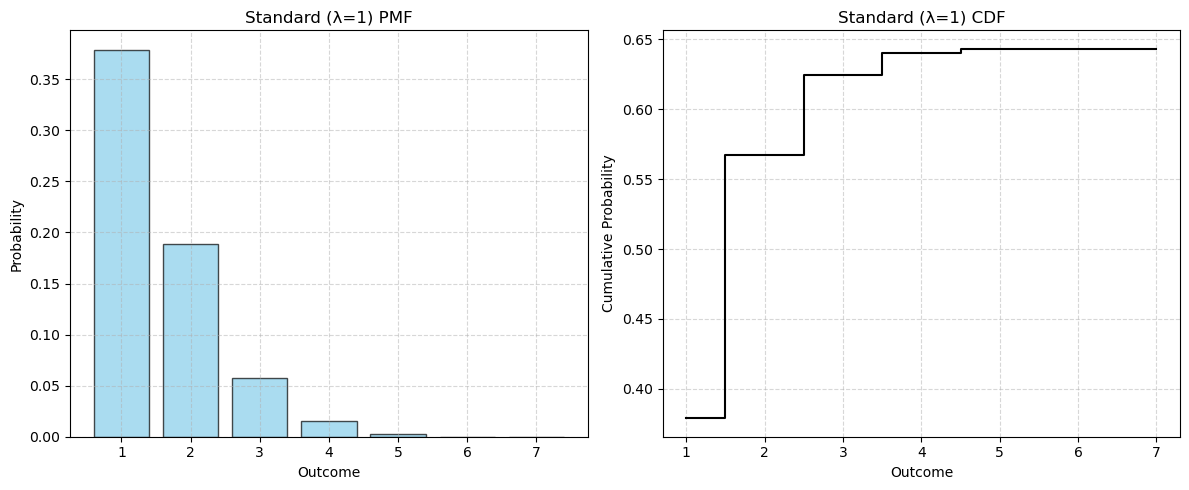

Average comparisons (Efficient): 2.10


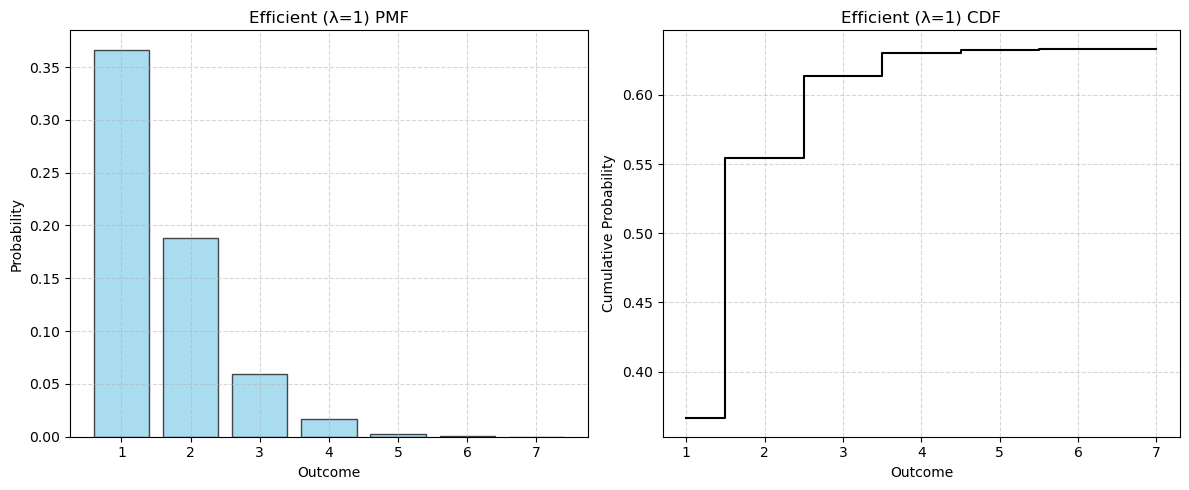


Generating Poisson samples with lambda = 2
Average comparisons (Standard): 3.01


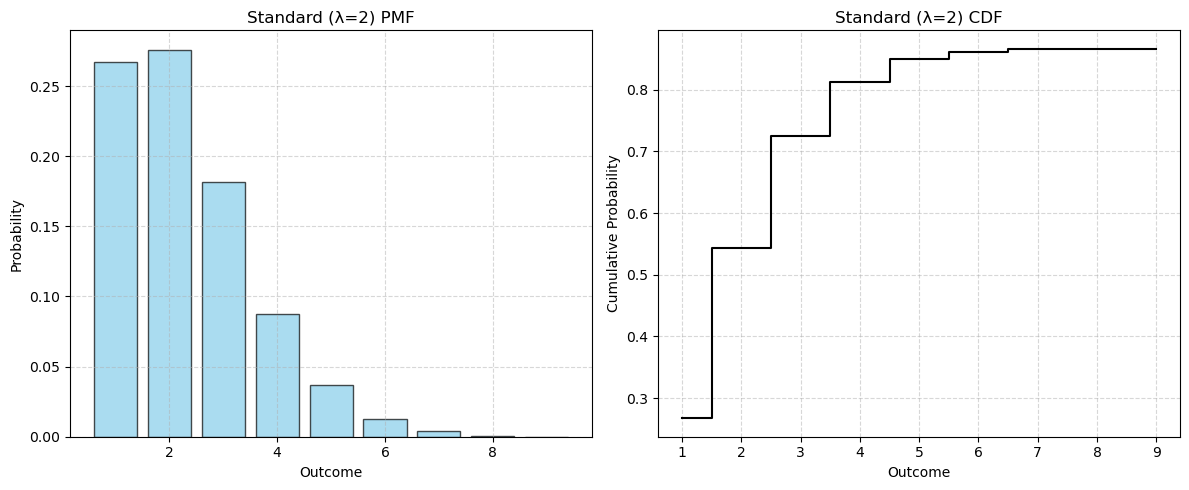

Average comparisons (Efficient): 2.63


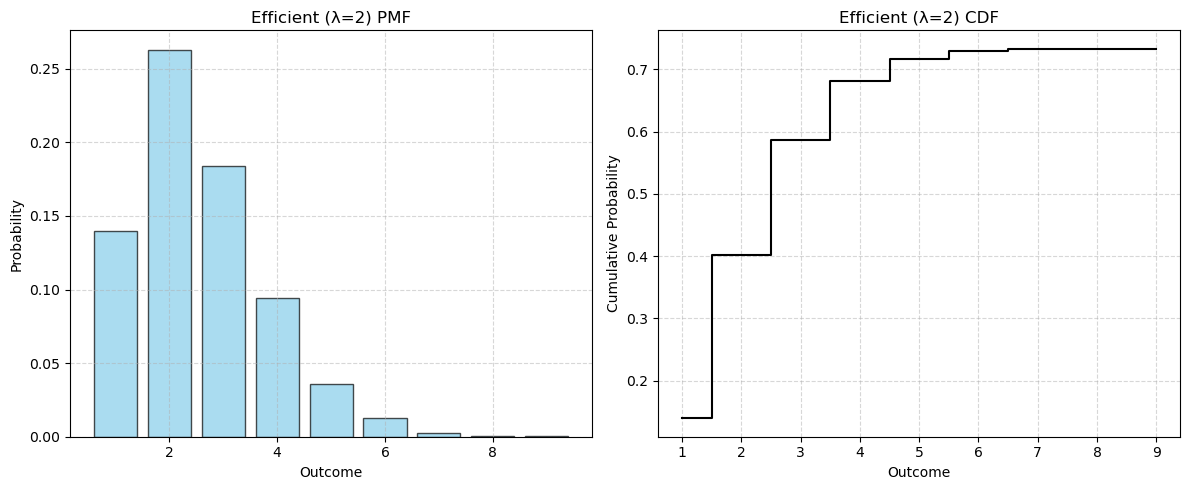


Generating Poisson samples with lambda = 5
Average comparisons (Standard): 5.96


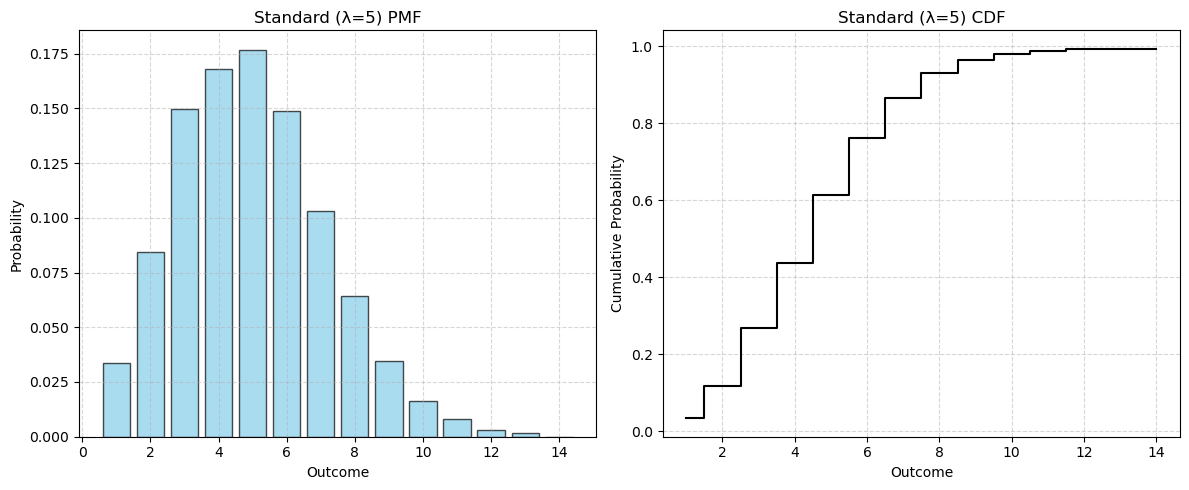

Average comparisons (Efficient): 3.64


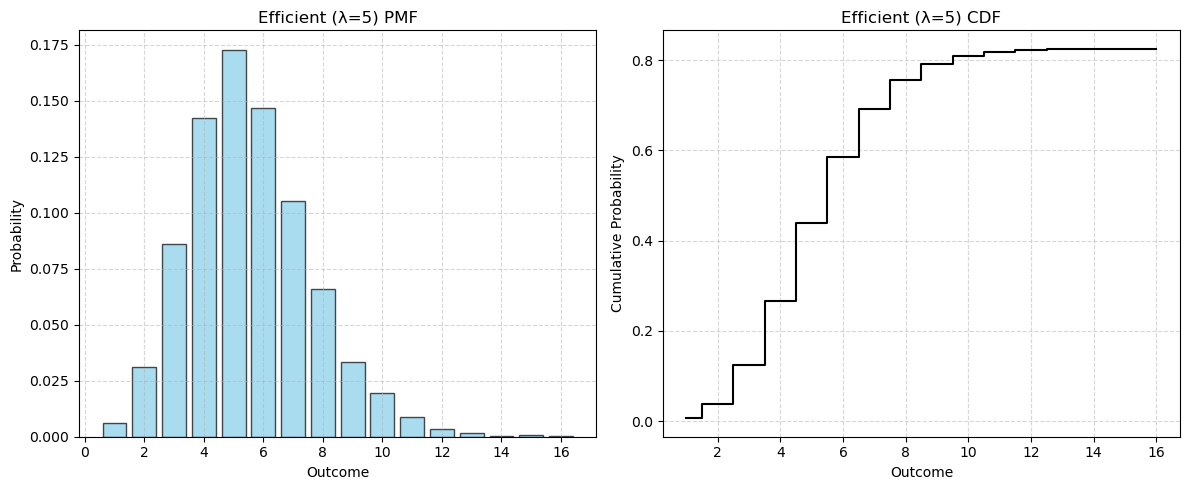


Generating Poisson samples with lambda = 10
Average comparisons (Standard): 10.96


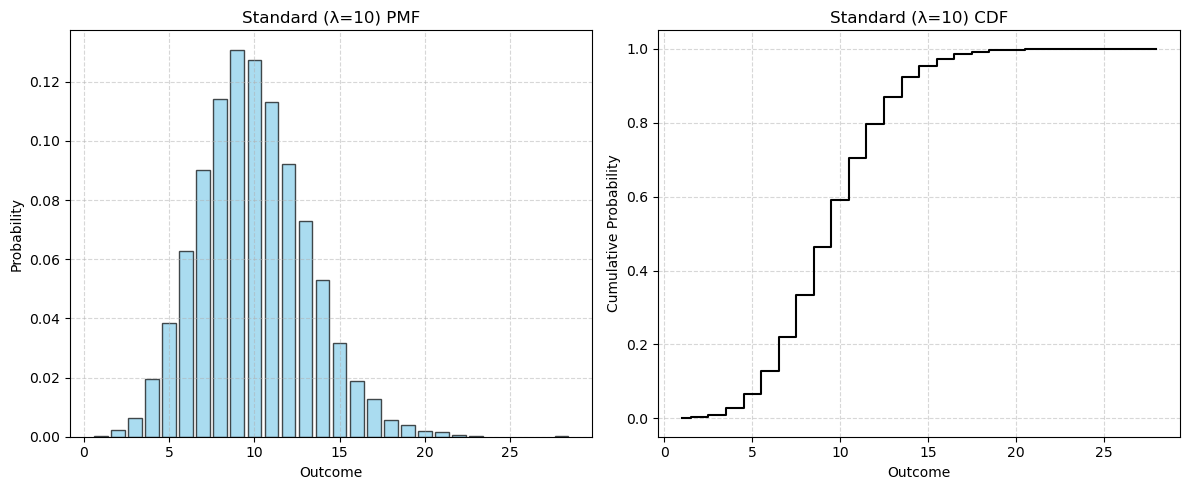

Average comparisons (Efficient): 4.76


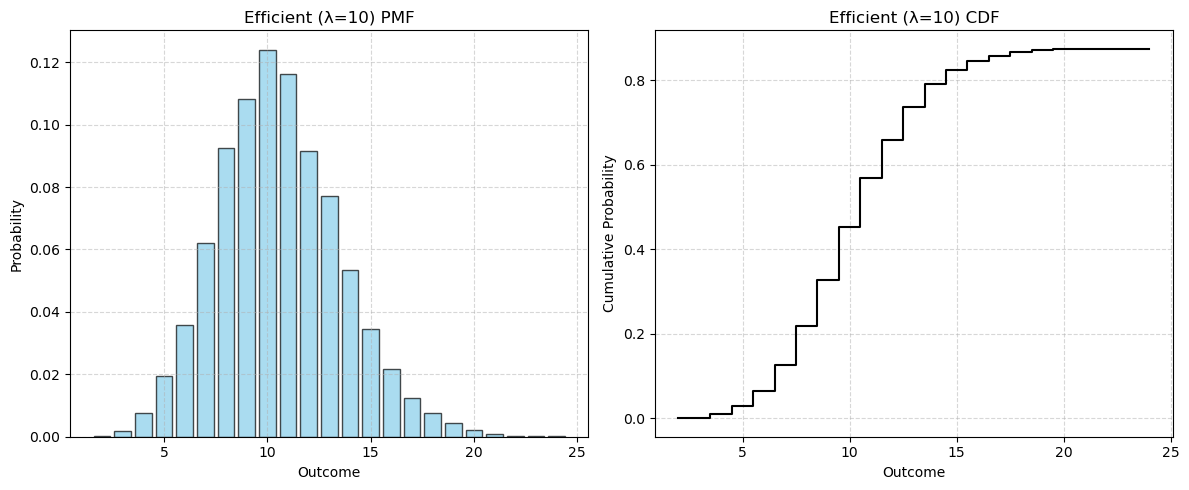


Generating Poisson samples with lambda = 20
Average comparisons (Standard): 21.12


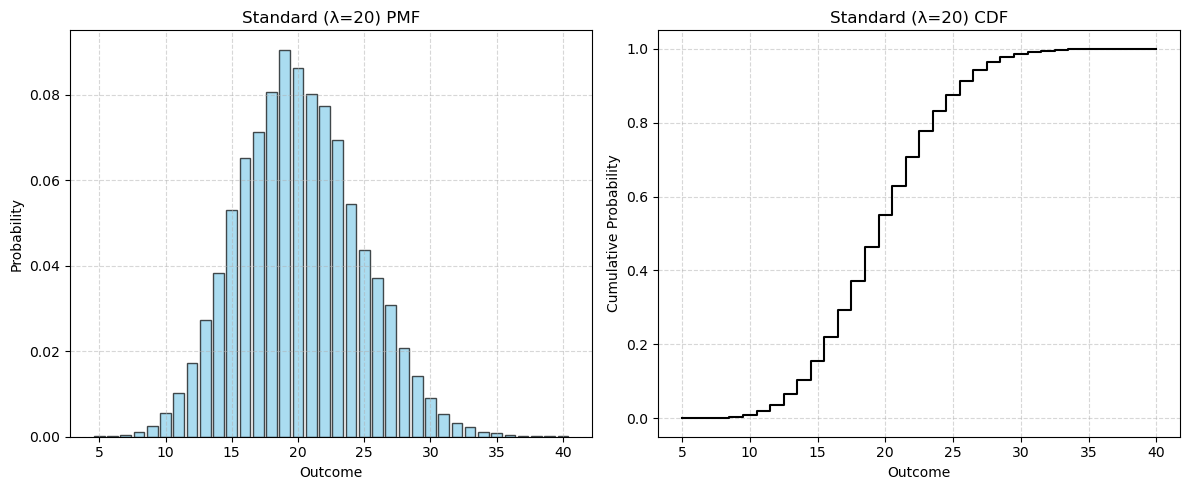

Average comparisons (Efficient): 6.33


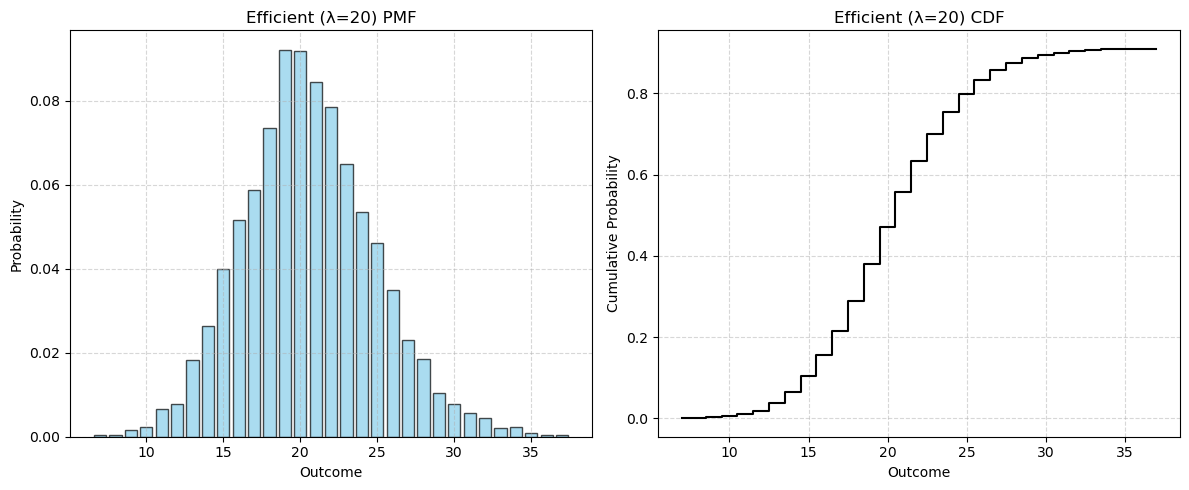


Generating Poisson samples with lambda = 50
Average comparisons (Standard): 50.95


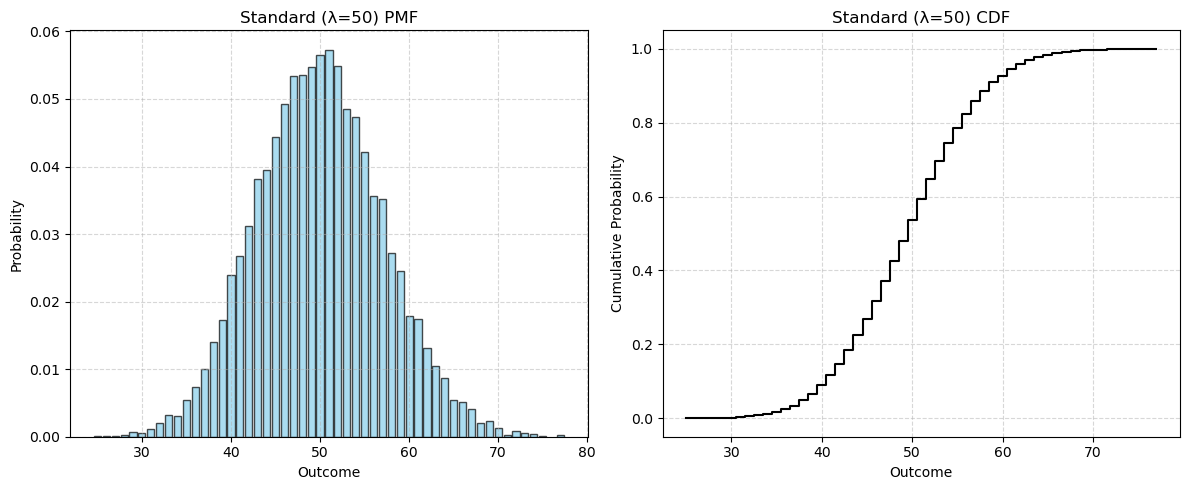

Average comparisons (Efficient): 9.28


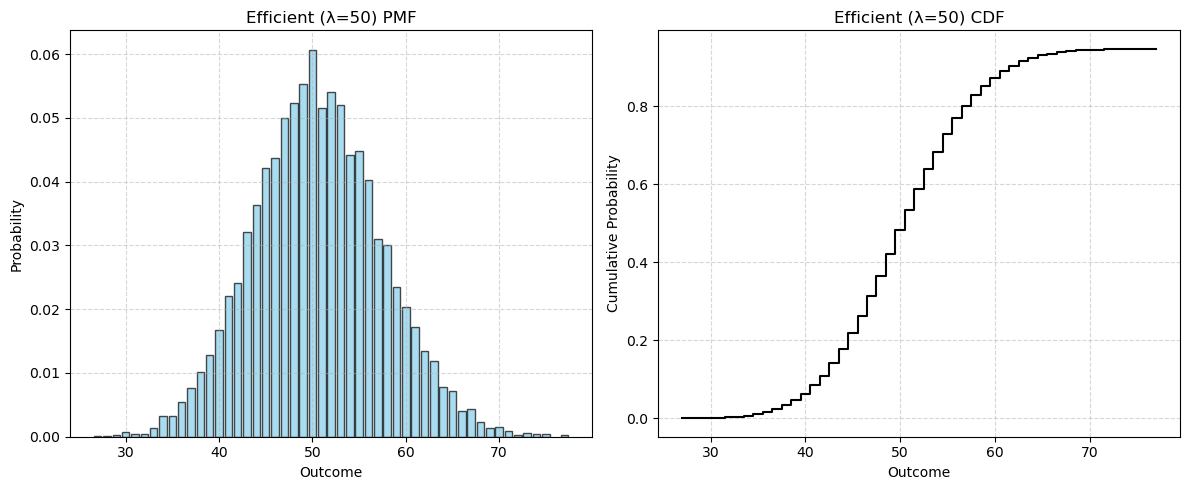


Generating Poisson samples with lambda = 100
Average comparisons (Standard): 101.01


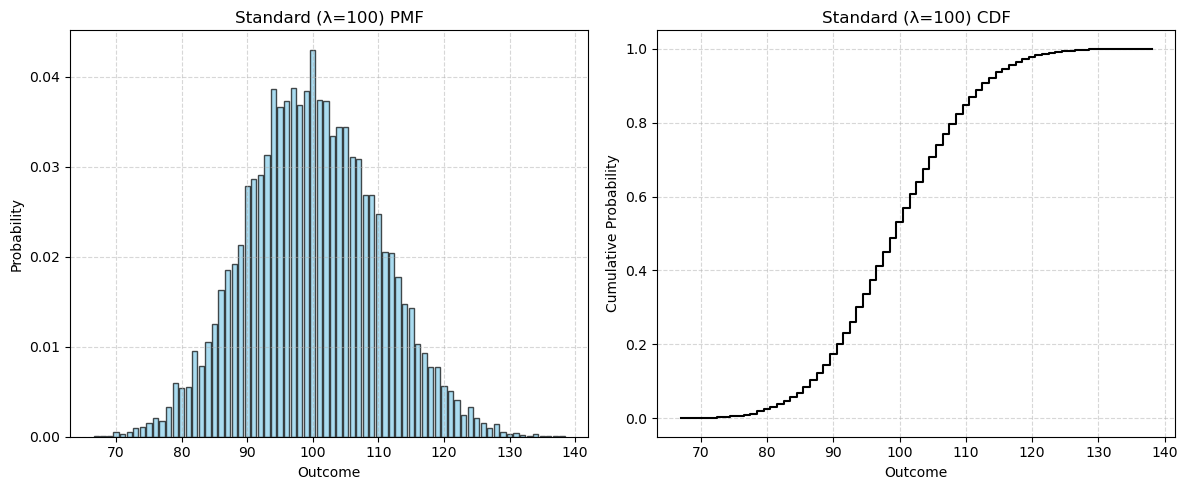

Average comparisons (Efficient): 12.89


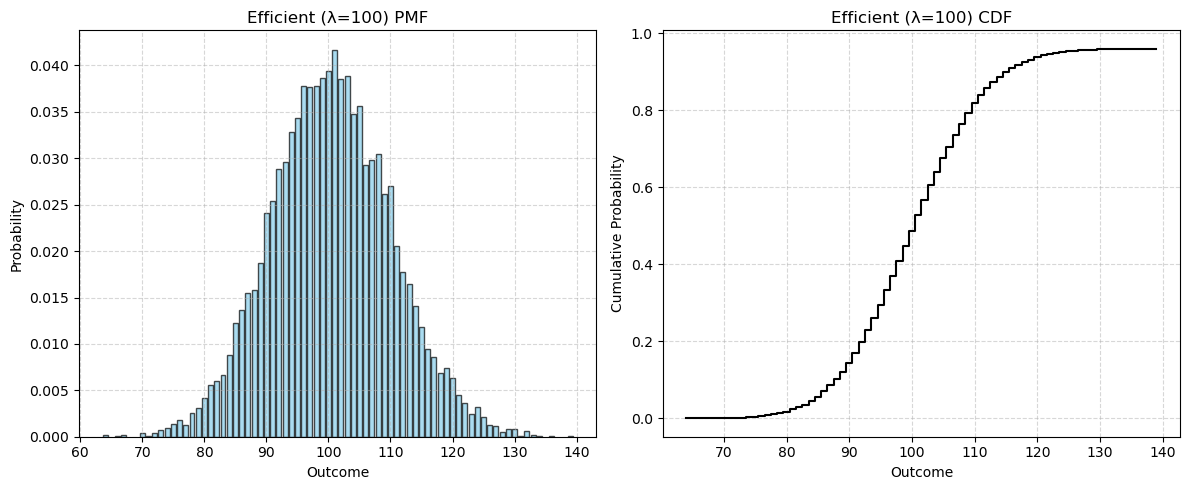


Generating Poisson samples with lambda = 200
Average comparisons (Standard): 201.01


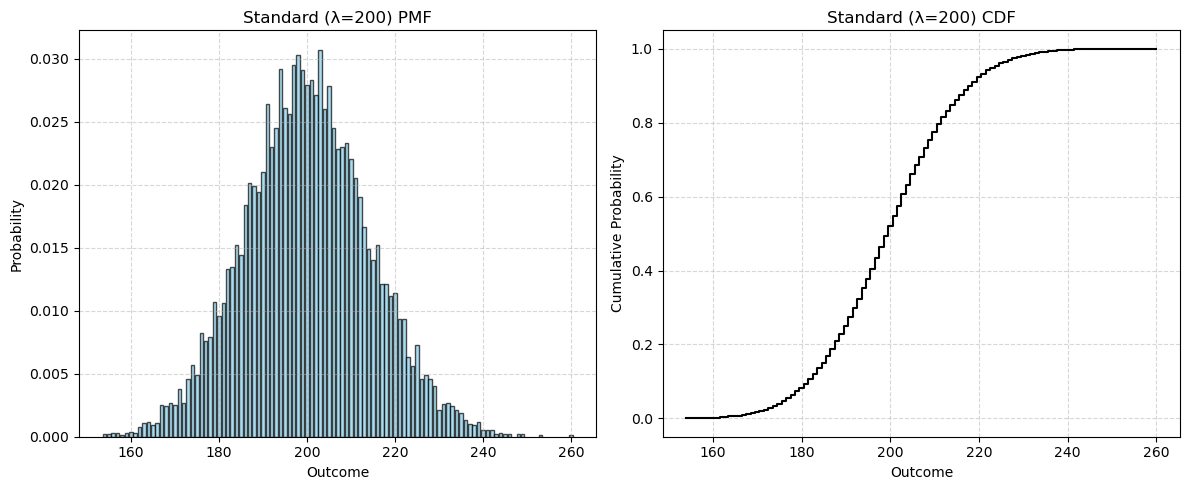

Average comparisons (Efficient): 18.19


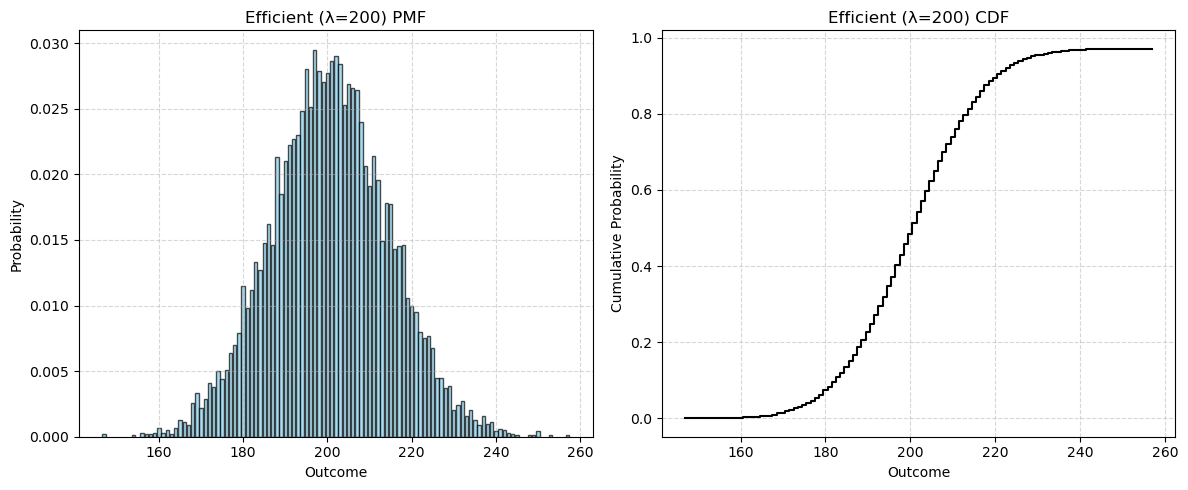


Generating Poisson samples with lambda = 500
Average comparisons (Standard): 501.10


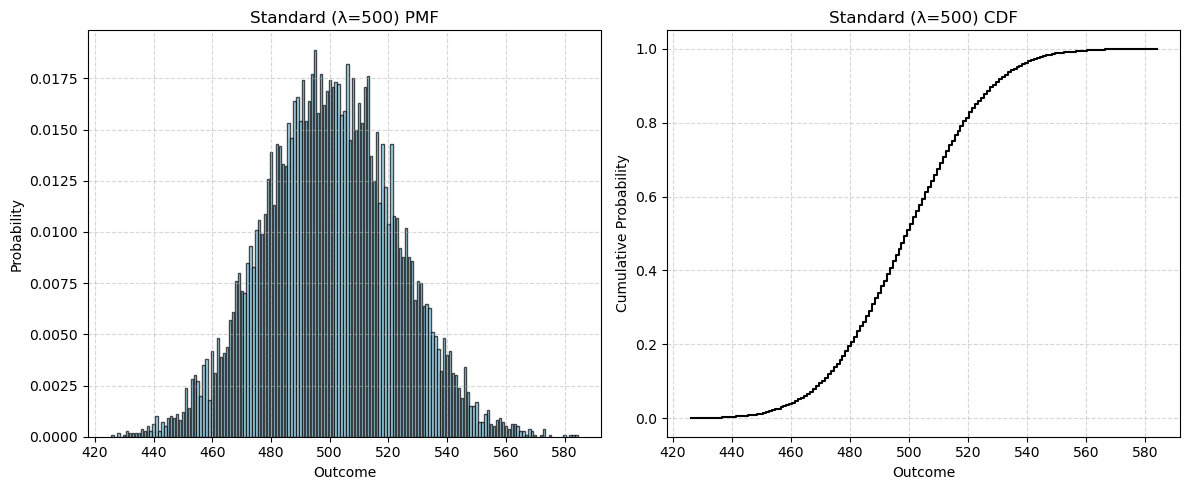

Average comparisons (Efficient): 27.82


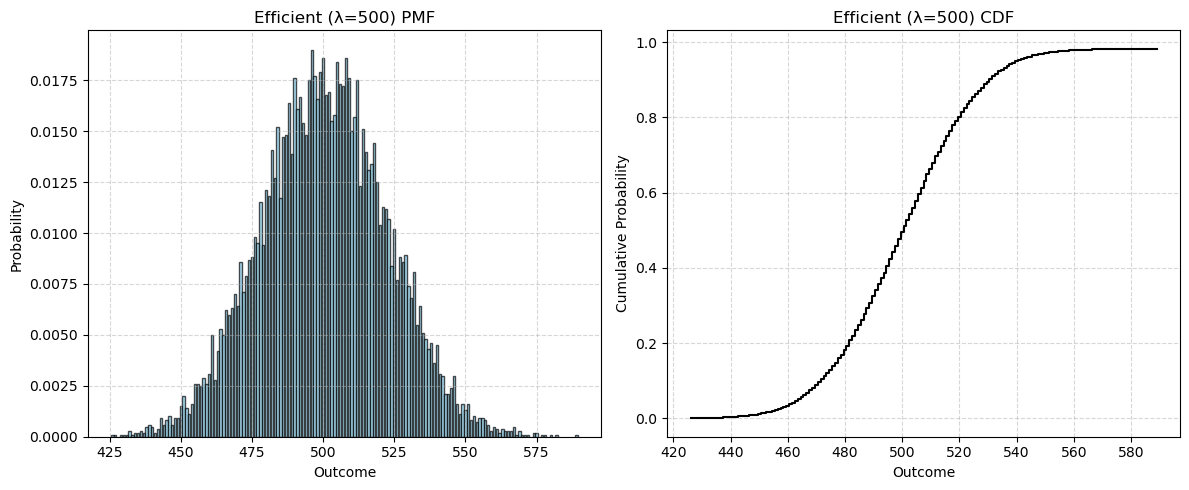

In [6]:
# parameters
lambda_values = [1, 2, 5, 10, 20, 50, 100, 200, 500]
n_samples = 10000

# Loop over different lambda values
for lam in lambda_values:
    print(f"\nGenerating Poisson samples with lambda = {lam}")

    # naive approach
    samples_std, comparisons_std = generate_poisson_samples(lam, n_samples, type='Standard')
    avg_comp_std = np.mean(comparisons_std)
    print(f"Average comparisons (Standard): {avg_comp_std:.2f}")
    plot_discrete_samples(samples_std, title_prefix=f'Standard (λ={lam})')

    # efficient algorithm
    samples_eff, comparisons_eff = generate_poisson_samples(lam, n_samples=n_samples, type='Efficient')
    avg_comp_eff = np.mean(comparisons_eff)
    print(f"Average comparisons (Efficient): {avg_comp_eff:.2f}")
    plot_discrete_samples(samples_eff, title_prefix=f'Efficient (λ={lam})')

Why is the second approach more efficient? What is the expected number of searches for both cases?

### Chapter 1 - Part 2 - Problem 1

We are given the density function
$$
f(x) = \frac{3}{2} x^{-5/2}, \quad x \in [1, \infty)
$$

The CDF is
$$
F(x) = \int_1^x \frac{3}{2} t^{-5/2}\,dt, \quad x \geq 1
$$

Compute
$$
F(x) = \frac{3}{2}\left[-\frac{2}{3} t^{-3/2}\right]_1^x
= \left(1 - x^{-3/2}\right), \quad x \geq 1
$$

So,
$$
F(x) =
\begin{cases}
0, & x < 1, \\
1 - x^{-3/2}, & x \geq 1.
\end{cases}
$$

Let $U \sim \text{Uniform}(0,1)$. We solve for $x$ in terms of $U$:
$$
U = F(x) = 1 - x^{-3/2}
$$

Rearrange:
$$
x^{-3/2} = 1 - U,
$$
$$
x = (1-U)^{-2/3}
$$


To generate $X \sim f(x)$:

1. Generate $U \sim \text{Uniform}(0,1)$  
2. Set  
   $$
   X = (1-U)^{-2/3}
   $$

This gives samples from the target distribution.


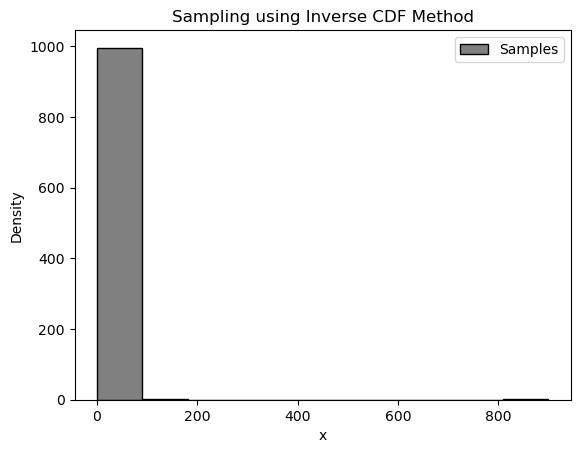

In [7]:
# generate samples using inverse CDF
n = 1000
U = np.random.uniform(0, 1, n)
X = (1 - U)**(-2/3)

# plot histogram
plt.hist(X, color="grey", edgecolor="black", label="Samples")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Sampling using Inverse CDF Method")
plt.legend()
plt.show()

### Chapter 1 - Part 2 - Problem 2

Let \(F\) be the Weibull CDF with parameters $\lambda>0$ and $k>0$:

$$
F(x)=
\begin{cases}
1-\exp\!\big(-(x/\lambda)^k\big), & x\ge 0,\\[4pt]
0, & x<0
\end{cases}
$$

For $u\in(0,1)$ we solve $u=F(x)$ for $x$. For $u>0$:
$$
u = 1 - \exp\!\big(-(x/\lambda)^k\big)
$$
$$
\exp\!\big(-(x/\lambda)^k\big)=1-u
$$
$$
-(x/\lambda)^k = \ln(1-u)
$$
$$
(x/\lambda)^k = -\ln(1-u)
$$

Thus the inverse is
$$
x = \lambda\big(-\ln(1-u)\big)^{1/k}
$$

Therefore, the quantile (inverse CDF) is
$$
F^{-1}(u)=\lambda\big(-\ln(1-u)\big)^{1/k},\qquad 0<u<1
$$

### Chapter 1 - Part 2 - Problem 3

We are asked to find the explicit inverse of the CDF of the Cauchy distribution:

$$
F(x) = \frac{1}{\pi}\arctan\!\left(\frac{x-x_0}{\gamma}\right) + \frac{1}{2}, \quad \gamma>0
$$

Let $u = F(x)$, where $u \in (0,1)$. Then,
$$
u = \frac{1}{\pi}\arctan\!\left(\frac{x-x_0}{\gamma}\right) + \frac{1}{2}
$$

Set
$$
Y = \frac{x-x_0}{\gamma}
$$
Then the CDF becomes
$$
u = \frac{1}{\pi}\arctan(Y) + \frac{1}{2}
$$
$$
\arctan(Y) = \pi\!\left(u - \tfrac{1}{2}\right)
$$
$$
Y = \tan\!\big(\pi(u - \tfrac{1}{2})\big)
$$

Since $Y = \dfrac{x-x_0}{\gamma}$, we have
$$
\frac{x-x_0}{\gamma} = \tan\!\big(\pi(u - \tfrac{1}{2})\big)
$$

Solving for $x$
$$
x = x_0 + \gamma \,\tan\!\big(\pi(u - \tfrac{1}{2})\big)
$$

The inverse CDF of the Cauchy distribution is therefore
$$
F^{-1}(u) = x_0 + \gamma \,\tan\!\big(\pi(u - \tfrac{1}{2})\big), \qquad 0<u<1
$$

### Chapter 1 - Part 2 - Problem 4

### Logistic distribution — inverse CDF and comparison with Normal

The logistic distribution with location parameter $\mu\in\mathbb{R}$ and scale $s>0$ has CDF
$$
F(x)=\frac{1}{1+e^{-(x-\mu)/s}},\qquad x\in\mathbb{R}
$$

To obtain the inverse CDF (quantile function) solve $u=F(x)$ for $x$ with $0<u<1$:
$$
u = \frac{1}{1+e^{-(x-\mu)/s}}
$$
Rearrange:
$$
1/u = 1+e^{-(x-\mu)/s} \quad\Longrightarrow\quad \frac{1-u}{u} = e^{-(x-\mu)/s}
$$
Take logarithms and solve for $x$:
$$
-(x-\mu)/s = \ln\!\left(\frac{1-u}{u}\right)
\quad\Longrightarrow\quad
x = \mu + s\;\ln\!\left(\frac{u}{1-u}\right)
$$

Thus the quantile function is
$$
F^{-1}(u)=\mu + s\ln\!\left(\frac{u}{1-u}\right),\qquad 0<u<1
$$

The density (PDF) of the logistic is
$$
f(x)=\frac{e^{-(x-\mu)/s}}{s\left(1+e^{-(x-\mu)/s}\right)^2}
=\frac{1}{s}\,\frac{e^{(x-\mu)/s}}{\left(1+e^{(x-\mu)/s}\right)^2}
$$

**Sampling (inverse-CDF):** generate $U\sim\mathrm{Uniform}(0,1)$ and set
$$
X=F^{-1}(U)=\mu + s\ln\!\left(\frac{U}{1-U}\right)
$$

**Difference vs. the Normal distribution (qualitative and a few facts):**
- Both are **symmetric** about their location parameter ($\mu$ is the mean/median for logistic).
- The logistic has **closed-form quantile** (simple logit transform); the Normal does not.
- The logistic has **heavier tails** than the Normal (so extreme values are more likely under logistic).
- Variance of logistic: For random variable $X \sim \text{Logistic}(\mu,s)$ then $\mathrm{Var}(X) = \dfrac{\pi^2}{3}s^2$.  
- For comparison, if one wishes to compare a logistic with scale $s$ to a Normal with the same variance, set the Normal standard deviation $\sigma = s\pi/\sqrt{3}$.


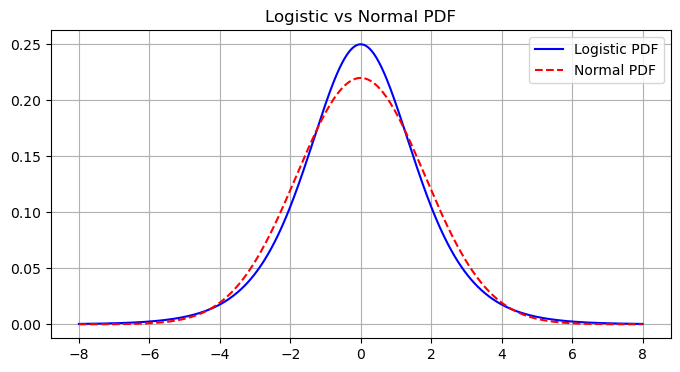

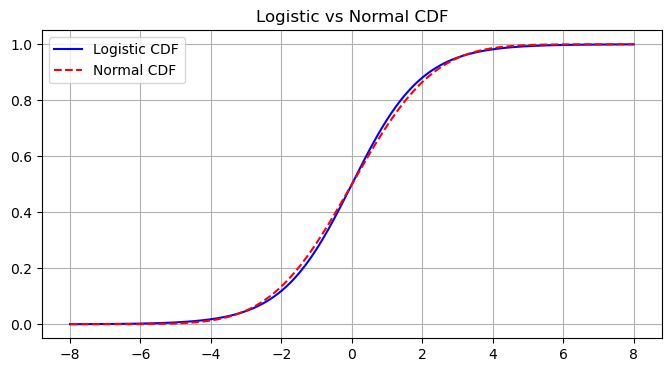

In [8]:
# parameters
mu = 0.0       # location
s = 1.0        # scale (logistic)
sigma_eq = np.pi / np.sqrt(3) * s  # variance-matching normal sigma

# range for plotting
x = np.linspace(-8, 8, 1000)

# logistic distribution
log_pdf = logistic.pdf(x, loc=mu, scale=s)
log_cdf = logistic.cdf(x, loc=mu, scale=s)

# normal distribution (with matched variance)
norm_pdf = norm.pdf(x, loc=mu, scale=sigma_eq)
norm_cdf = norm.cdf(x, loc=mu, scale=sigma_eq)

# plot PDFs
plt.figure(figsize=(8, 4))
plt.plot(x, log_pdf, label="Logistic PDF", color="blue")
plt.plot(x, norm_pdf, label="Normal PDF", color="red", linestyle="--")
plt.title("Logistic vs Normal PDF")
plt.legend()
plt.grid(True)
plt.show()

# plot CDFs
plt.figure(figsize=(8, 4))
plt.plot(x, log_cdf, label="Logistic CDF", color="blue")
plt.plot(x, norm_cdf, label="Normal CDF", color="red", linestyle="--")
plt.title("Logistic vs Normal CDF")
plt.legend()
plt.grid(True)
plt.show()


### Chapter 1 - Part 3 - Problem 1

We want to sample from the density

$$
f(x) = 
\begin{cases}
\dfrac{3x^2 + 7x^6}{2}, & x \in [0,1], \\[2mm]
0, & \text{otherwise}
\end{cases}
$$

using the **envelope (rejection) sampling method** with proposal distribution 
$$
g(x) = 1, \quad x \in [0,1]
$$
i.e. the Uniform$[0,1]$.

We need a constant $c > 0$ such that
$$
f(x) \leq c g(x) \quad \text{for all } x \in [0,1]
$$
Since $g(x)=1$, this means
$$
c = \max_{x \in [0,1]} f(x)
$$

Now,
$$
f(x) = \frac{3x^2 + 7x^6}{2}.
$$

- At $x=0$: $f(0)=0$.  
- At $x=1$: $f(1) = \frac{3+7}{2} = 5$.  
- Derivative check:
$$
f'(x) = \frac{6x + 42x^5}{2} = 3x + 21x^5 > 0 \quad \text{for } x>0.
$$

So $f(x)$ is increasing on $[0,1]$, hence maximum at $x=1$.  
Therefore,
$$
c = 5.
$$

The overall acceptance probability is
$$
\alpha = \frac{1}{c} \int_0^1 f(x)\, dx.
$$

Compute:
$$
\int_0^1 f(x)\,dx 
= \frac{1}{2} \int_0^1 (3x^2 + 7x^6)\,dx
= \frac{1}{2}\left[ x^3 + x^7 \right]_0^1
= \frac{1}{2}(1+1)
= 1.
$$

Thus,
$$
\alpha = \frac{1}{5}.
$$

So **only 20% of proposals are accepted**.  
On average, to obtain \(1000\) accepted samples, we need
$$
1000 / 0.2 = 5000 \text{ proposals}.
$$


#### Suggest better proposal
Since $f(x)$ is proportional to a polynomial in $x$, a better choice is a **Beta distribution** with higher mass near $x=1$.  

For example, $g(x) = \text{Beta}(3,1)$ or $g(x)=\text{Beta}(7,1)$, because these resemble $x^2$ or $x^6$.  
This would reduce rejections significantly.


Generated samples: 1000
Total proposals: 4668
Average proposals per accepted sample: 4.668


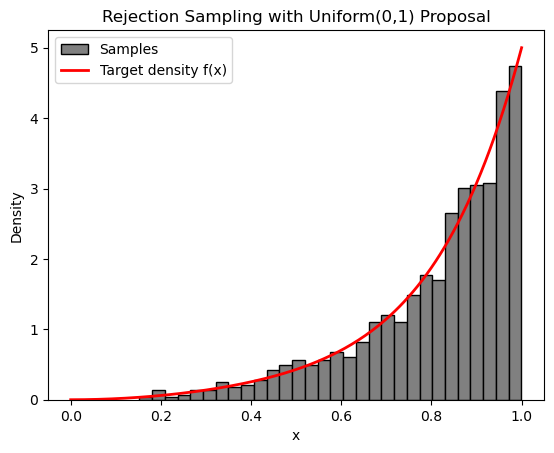

In [9]:
# target density
def f(x):
    return 0.5 * (3*x**2 + 7*x**6) * (0 <= x) * (x <= 1)

# proposal density: Uniform(0,1), g(x)=1
M = 5  # envelope constant
n = 1000  # desired sample size
samples = []

proposals = 0
while len(samples) < n:
    X = np.random.rand()        # proposal from U[0,1]
    U = np.random.rand()        # uniform(0,1)
    proposals += 1
    if U < f(X)/M:
        samples.append(X)

samples = np.array(samples)

print("Generated samples:", len(samples))
print("Total proposals:", proposals)
print("Average proposals per accepted sample:", proposals/len(samples))

# plot histogram of accepted samples
plt.hist(samples, bins=30, density=True, color="grey", edgecolor="black", label="Samples")
xgrid = np.linspace(0,1,200)
plt.plot(xgrid, f(xgrid), "r-", lw=2, label="Target density f(x)")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Rejection Sampling with Uniform(0,1) Proposal")
plt.legend()
plt.show()

### Chapter 1 - Part 4 - Problem 1

To sample uniformly from a rectangle $[a,b] \times [c,d]$, independently generate  $X \sim U[a,b]$ and $Y \sim U[c,d]$.
Each point $(X,Y)$ will then be uniformly distributed over the rectangle.

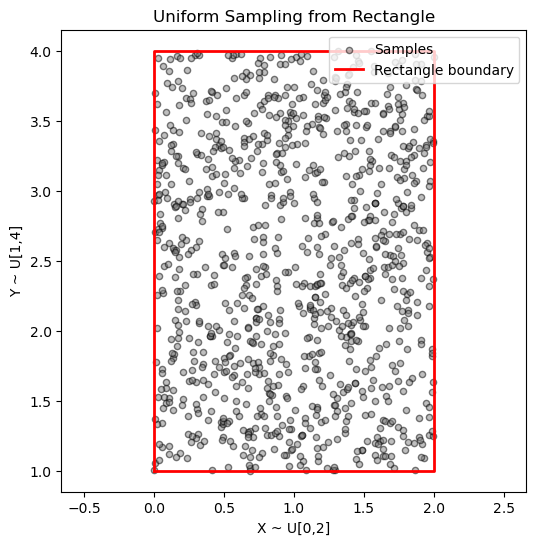

In [10]:
n = 1000   # number of samples

# sample X ~ U[0,2], Y ~ U[1,4]
X = np.random.uniform(0, 2, n)
Y = np.random.uniform(1, 4, n)

# plot the rectangle with points and draw boundary
plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=20, alpha=0.5, color="grey", edgecolor="black", label="Samples")
plt.plot([0,2,2,0,0],[1,1,4,4,1],"r-", lw=2, label="Rectangle boundary")

plt.xlabel("X ~ U[0,2]")
plt.ylabel("Y ~ U[1,4]")
plt.title("Uniform Sampling from Rectangle")
plt.legend()
plt.axis("equal")
plt.show()

### Chapter 1 - Part 4 - Problem 2

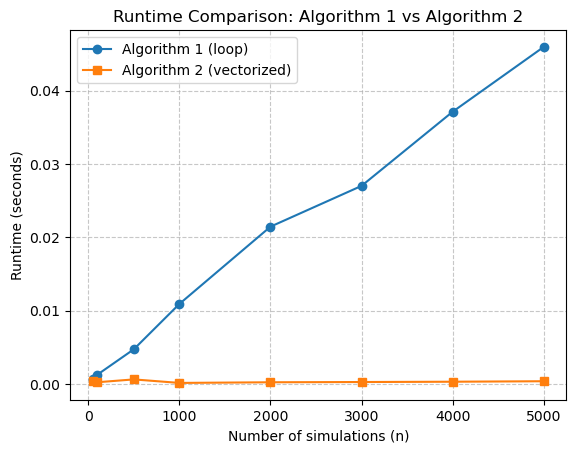

In [11]:
# ---------------------------------------------------------
# algorithm 1: loop-based rejection sampling in semicircle
# ---------------------------------------------------------
def alg1_semicircle(n):
    """
    Generate n random points uniformly distributed inside the
    upper unit semicircle:
        {(x, y): x^2 + y^2 < 1, y >= 0}.
    
    Method:
    - Propose candidate points uniformly in the rectangle [-1,1]x[0,1].
    - Accept a candidate if it lies inside the semicircle.
    - Continue until n accepted points are obtained.
    
    Parameters
    ----------
    n : int
        Number of points to generate.
    
    Returns
    -------
    X1 : numpy.ndarray
        Array of x-coordinates of accepted points.
    X2 : numpy.ndarray
        Array of y-coordinates of accepted points.
    """
    X1, X2 = [], []
    count = 0
    while count < n:
        u1 = np.random.uniform(-1, 1)   # candidate x-coordinate
        u2 = np.random.uniform(0, 1)    # candidate y-coordinate
        if u1**2 + u2**2 < 1:           # check if inside semicircle
            X1.append(u1)
            X2.append(u2)
            count += 1
    return np.array(X1), np.array(X2)


# ---------------------------------------------------------
# algorithm 2: vectorized rejection sampling in semicircle
# ---------------------------------------------------------
def alg2_semicircle(n):
    """
    Generate n random points uniformly distributed inside the
    upper unit semicircle, using a vectorized rejection sampling approach.
    
    Method:
    - Generate 2n candidate points at once in the rectangle [-1,1]x[0,1].
    - Retain only those points lying inside the semicircle.
    - If at least n valid points are found, return the first n.
    - Otherwise, repeat with new proposals.
    
    Parameters
    ----------
    n : int
        Number of points to generate.
    
    Returns
    -------
    X1 : numpy.ndarray
        Array of x-coordinates of accepted points.
    X2 : numpy.ndarray
        Array of y-coordinates of accepted points.
    """
    while True:
        u1 = np.random.uniform(-1, 1, size=2*n)  # batch of candidate x-values
        u2 = np.random.uniform(0, 1, size=2*n)   # batch of candidate y-values
        inside = u1**2 + u2**2 < 1               # boolean mask for valid points
        if inside.sum() >= n:                    # ensure enough accepted points
            return u1[inside][:n], u2[inside][:n]


# runtime comparison experiment
num_sims = [50, 100, 500, 1000, 2000, 3000, 4000, 5000]
times_alg1, times_alg2 = [], []

for n in num_sims:
    # Algorithm 1 timing
    start = time.time()
    alg1_semicircle(n)
    end = time.time()
    times_alg1.append(end - start)

    # Algorithm 2 timing
    start = time.time()
    alg2_semicircle(n)
    end = time.time()
    times_alg2.append(end - start)

# plot runtime
plt.plot(num_sims, times_alg1, marker="o", label="Algorithm 1 (loop)")
plt.plot(num_sims, times_alg2, marker="s", label="Algorithm 2 (vectorized)")
plt.xlabel("Number of simulations (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison: Algorithm 1 vs Algorithm 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Chapter 1 - Part 4 - Problem 3

We want to generate samples from a conditional distribution:  

$X \sim \text{Binomial}(n=10, p=0.6) |  X \geq 5$ 

The steps are: 
   - Generate samples from $X \sim \text{Binomial}(10, 0.6)$.  
   - Keep only those samples where $X \geq 5$.  
   - Continue until we have the required number of samples.

The rejection method is simple, but the direct approach is more efficient since it avoids discarding samples.  


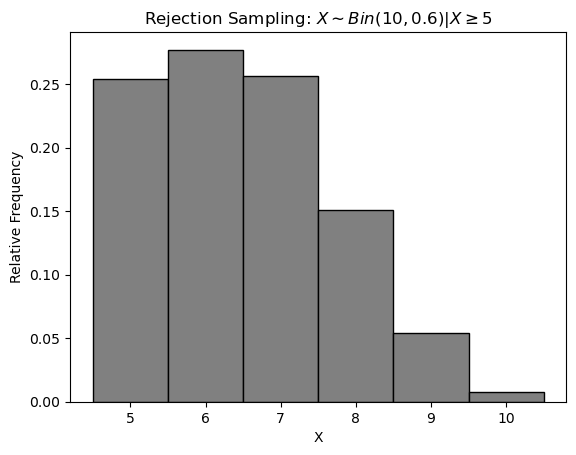

In [12]:
def rejection_binomial(n, p, N, condition):
    """
    Generate random samples from a Binomial(n, p) distribution 
    conditioned on the event {X >= c}, using rejection sampling.
    
    Parameters
    ----------
    n : int
        Number of Bernoulli trials in the Binomial distribution.
    p : float
        Probability of success in each trial (0 <= p <= 1).
    N : int
        Desired number of accepted samples.
    
    Returns
    -------
    samples : numpy.ndarray
        Array of size N containing samples from the conditional 
        distribution Binomial(n, p | X >= c).

    """
    samples = []
    while len(samples) < N:
        x = np.random.binomial(n, p)   # proposal from Binomial(n,p)
        if x >= condition:             # accept if condition satisfied
            samples.append(x)
    return np.array(samples)


# parameters
n, p, c = 10, 0.6, 5
N = 1000  # number of samples

# generate conditional samples
samples = rejection_binomial(n, p, N, c)

# plot histogram
plt.hist(samples, bins=np.arange(4.5, n+1.5, 1),
         density=True, color="grey", edgecolor="black")
plt.xlabel("X")
plt.ylabel("Relative Frequency")
plt.title("Rejection Sampling: $X \\sim Bin(10, 0.6) | X \\geq 5$")
plt.show()


### Chapter 1 - Part 4 - Problem 4

We want to generate 500 uniformly distributed random points in the region  

$$R = \{ (x,y): -\tfrac{\pi}{2} \leq x \leq \tfrac{\pi}{2}, \ 0 \leq y \leq \cos(x) \}.$$

**Approach (Rejection Sampling):**
1. Define the bounding rectangle:  
   $x \in [-\pi/2, \pi/2], \quad y \in [0, 1]$
   since $\cos(x) \leq 1$.
2. Generate candidate points $(X,Y)$ uniformly inside this rectangle.  
3. Accept $(X,Y)$ if $Y \leq \cos(X)$.  
4. Repeat until we have 500 accepted points.


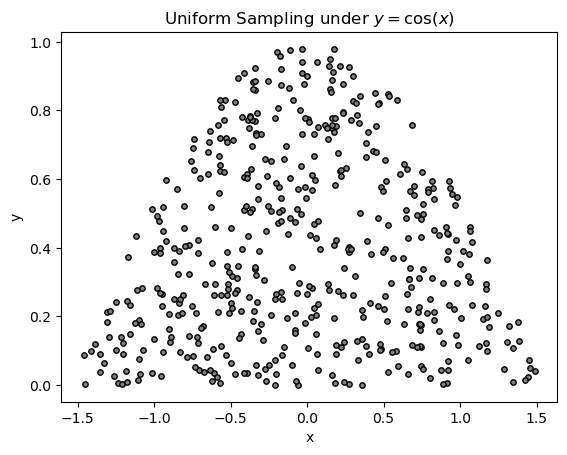

In [13]:
# parameters
N = 500  # number of accepted samples
samples = []

while len(samples) < N:
    # step 1: propose candidate points in bounding rectangle
    x = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, 1)
    
    # step 2: accept if inside region y <= cos(x)
    if y <= np.cos(x):
        samples.append((x, y))

samples = np.array(samples)

# plot accepted points
plt.scatter(samples[:,0], samples[:,1], color="grey", s=15, edgecolor="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform Sampling under $y = \\cos(x)$")
plt.show()

### Chapter 1 - Part 5 - Problem 1

We want to simulate random numbers from the density
$$
   f(x) = \frac{1}{(x+1)\ln 2}, \quad x \in [0,1]
$$

1. Define the bounding rectangle  
$$
   A = \{ (x,y) : 0 \leq x \leq 1, \; 0 \leq y < 1/\ln 2 \}
$$

2. The target region is  
$$
   B = \{ (x,y) : 0 \leq x \leq 1, \; 0 \leq y < f(x) \}
$$

3. Generate candidate points $(x,y)$ uniformly in **A**.  
   - $x \sim U[0,1]$ 
   - $y \sim U[0,1/\ln 2]$

4. Accept a point if $y < f(x)$.  
   - This ensures uniformity inside **B**.  

5. To sample from density $f(x)$, keep only the **x-coordinates** of accepted points.

---


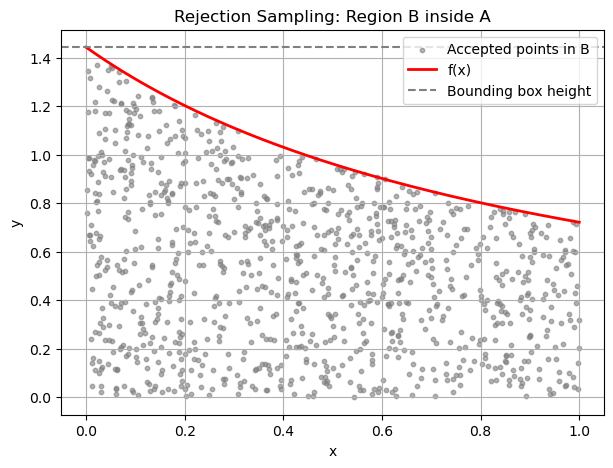

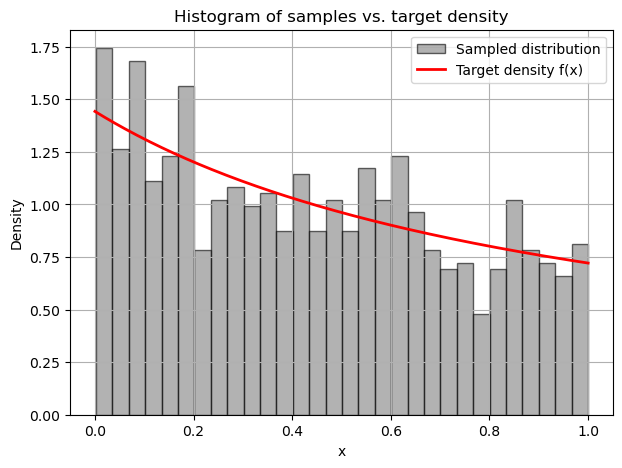

In [14]:
# target density
def f(x):
    return 1 / ((x + 1) * np.log(2))

# part (a): Generate uniform random points in B via rejection sampling
def sample_in_B(n_samples):
    samples_x, samples_y = [], []
    max_y = 1 / np.log(2)  # height of rectangle A
    
    while len(samples_x) < n_samples:
        # Candidate from rectangle A
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, max_y)
        
        # Accept if inside B
        if y < f(x):
            samples_x.append(x)
            samples_y.append(y)
    
    return np.array(samples_x), np.array(samples_y)

# part (b): extract X samples with density f
n = 1000
xs, ys = sample_in_B(n)

# plot accepted points (in B)
plt.figure(figsize=(7,5))
plt.scatter(xs, ys, s=10, alpha=0.6, color='gray' ,label="Accepted points in B")
x_plot = np.linspace(0, 1, 200)
plt.plot(x_plot, f(x_plot), 'r', lw=2, label="f(x)")
plt.axhline(1/np.log(2), color="gray", linestyle="--", label="Bounding box height")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rejection Sampling: Region B inside A")
plt.legend()
plt.grid(True)
plt.show()

# plot histogram of samples from density f
plt.figure(figsize=(7,5))
plt.hist(xs, bins=30, density=True, color='gray', edgecolor='black', alpha=0.6, label="Sampled distribution")
plt.plot(x_plot, f(x_plot), 'r', lw=2, label="Target density f(x)")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of samples vs. target density")
plt.legend()
plt.grid(True)
plt.show()